# Movie Genres Data Analysis Project

### Research Questions:
1. Which genres are the most common (number of movies made)?
2. Which genres have high average budget and revenue?
3. Which genres have high average popularity?
4. Which genres have the highest number of movies with an average audience score of 8 or higher?

### Research Hypotheses:
1.  The best movies according to audience score return high revenue/profit.
2.  The best movies according to popularity return high revenue/profit.
3.  Movies with larger budgets return high revenue/profit.
4.  Movies with larger budgets have higher popularity.

### Data Cleaning and Transformation

In [12]:
import pandas as pd

movies = pd.read_csv(r'C:\Users\Stephen\Documents\Data Analysis\Analyst Builder\Python projects\imdb_movies.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [13]:
pd.set_option('display.max.rows', 11000)
pd.set_option('display.max.columns', 22)
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [14]:
# Identify duplicate rows
# movies[movies.duplicated()]

# Drop duplicate rows
movies.drop_duplicates(inplace = True)

In [15]:
# Remove rows with 'null' for the genre column
movies.dropna(subset = ['genres'], inplace = True)

In [16]:
# Create a new column for profit
movies['profit'] = movies['revenue'] - movies['budget']

In [17]:
# Select columns to keep to answer our questions, delete the rest to reduce memory usage
movies_genre = movies[['popularity','budget','revenue','original_title','runtime','genres','release_date','vote_count','vote_average','profit']]
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,1316249360


In [18]:
from pandas import Series, DataFrame

In [19]:
# Split up the 'genres' column into a series with stacked indices, then join it to the original dataframe
split = movies_genre['genres'].str.split('|').apply(Series,1).stack()
split.index = split.index.droplevel(-1)
split.name = 'genres_split'
del movies_genre['genres']
movies_genre = movies_genre.join(split)
movies_genre.head()

C:\Users\Stephen\AppData\Local\Temp\ipykernel_15836\2110631587.py:2: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  split = movies_genre['genres'].str.split('|').apply(Series,1).stack()


,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,6185,7.1,228436354,Action


### Research Question 1: Which genres are the most common (number of movies made)?

In [21]:
# Use groupby to count the number of movies in each genre
genres_count = pd.DataFrame(movies_genre.groupby('genres_split').original_title.nunique()).sort_values('original_title', ascending = True)
genres_count

,original_title
genres_split,
Western,163
TV Movie,167
Foreign,188
War,269
History,331
Music,403
Documentary,520
Animation,697
Mystery,796


<Axes: title={'center': 'Movies Per Genre'}, ylabel='genres_split'>

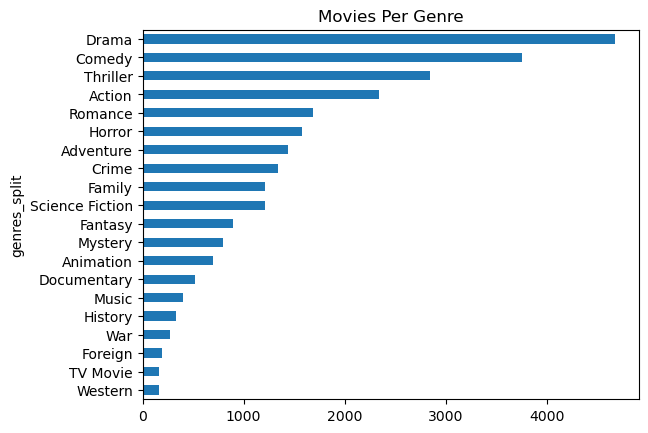

In [22]:
# Visualize the genre count in a bar chart
genres_count.plot.barh(title = 'Movies Per Genre', legend = False)

The top five genres in this dataset are drama, comedy, thriller, action, and romance.

### Research Question 2: Which genres have high average budget and revenue?

In [25]:
# Use groupby to calculate the mean budgets and revenues for each genre
genres_avg = movies_genre.groupby('genres_split')[['budget','revenue','profit']].mean()
pd.options.display.float_format = '{:2f}'.format
genres_avg.sort_values('budget', ascending = True, inplace = True)
genres_avg

,budget,revenue,profit
genres_split,,,
TV Movie,267664.670659,251497.005988,-16167.664671
Documentary,577149.148077,2041106.994231,1463957.846154
Foreign,1451434.925532,1520459.835106,69024.909574
Horror,6226529.210751,16822808.624313,10596279.413561
Music,9438627.549020,28571768.691176,19133141.142157
Drama,11880717.773529,29232255.725840,17351537.952311
Romance,12531271.847547,35691972.327103,23160700.479556
Comedy,13297915.618244,37526242.072238,24228326.453994
Mystery,16119270.062963,40217566.661728,24098296.598765


<Axes: title={'center': 'Budget and Revenue by Genre'}, ylabel='genres_split'>

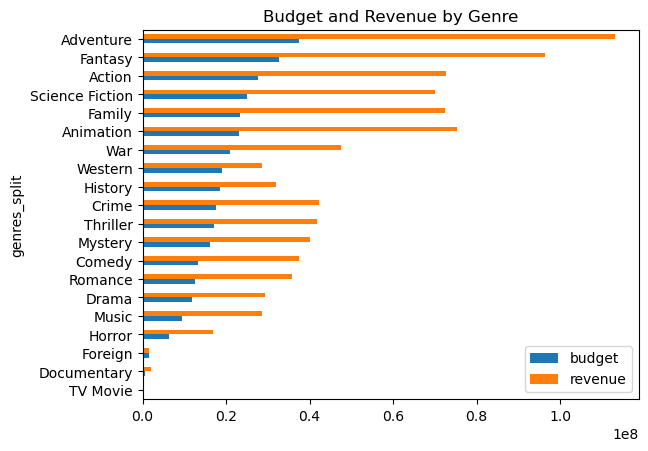

In [26]:
# Visualize the mean budget and revenue in a bar chart
genres_avg[['budget','revenue']].plot.barh(title = 'Budget and Revenue by Genre')

Movies in the adventure, fantasy, action, sci-fi, and family genres have the largest average budgets. Movies in the adventure, fantasy, animation, action, and family genres have the highest average revenues.

<Axes: title={'center': 'Profit by Genre'}, ylabel='genres_split'>

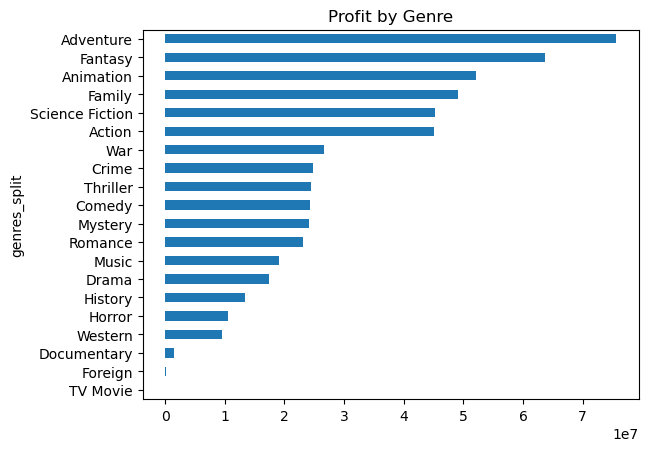

In [28]:
# Visualize the mean profit in a bar chart
genres_avg.sort_values('profit', ascending = True, inplace = True)
genres_avg['profit'].plot.barh(title = 'Profit by Genre')

Movies in the adventure, fantasy, animation, family, and sci-fi genres have the largets profits.

### Research Question 3: Which genres have high average popularity?

In [31]:
# Use groupby to calculate the mean popularity for each genre
genres_score = movies_genre.groupby('genres_split')[['popularity']].mean()
genres_score.sort_values('popularity', ascending = True, inplace = True)
genres_score

,popularity
genres_split,
Documentary,0.181432
Foreign,0.191496
TV Movie,0.270896
Horror,0.465357
Music,0.487321
History,0.575936
Western,0.590615
Drama,0.591495
Romance,0.592082


<Axes: title={'center': 'Popularity by Genre'}, ylabel='genres_split'>

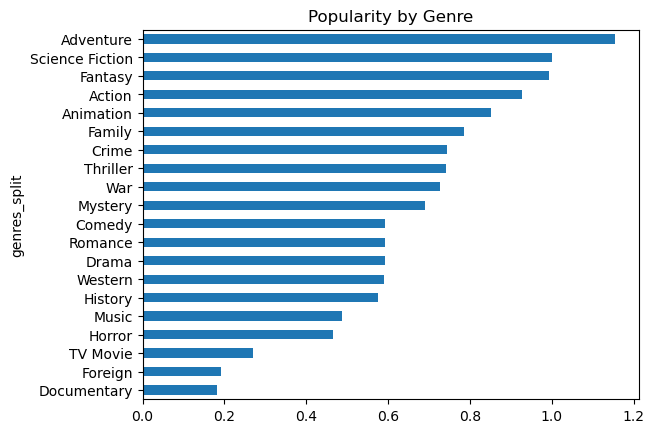

In [32]:
# Visualize the mean popularity in a bar chart
genres_score.sort_values('popularity', ascending = True, inplace = True)
genres_score['popularity'].plot.barh(title = 'Popularity by Genre')

Movies in the adventure, sci-fi, fantasy, action, and animation genres have the highest average popularity scores on IMDB.

### Research Question 4: Which genres have the highest number of movies with an average audience score of 8 or higher?

In [35]:
# Filter the dataframe to only include movies with more than 50 votes, and a score of 8 or higher.
vote_fifty = movies_genre[(movies_genre['vote_count'] >= 50) & (movies_genre['vote_average'] >= 8)]

In [36]:
# Use groupby to show the average vote score for each genre (sample size >= 50)
genres_vote = pd.DataFrame(vote_fifty.groupby('genres_split').vote_average.nunique()).sort_values('vote_average', ascending = True)
genres_vote

,vote_average
genres_split,
Fantasy,1
Science Fiction,1
Animation,1
Mystery,1
Horror,1
Family,1
Romance,2
Music,2
History,2


<Axes: title={'center': 'Vote Average by Genre'}, ylabel='genres_split'>

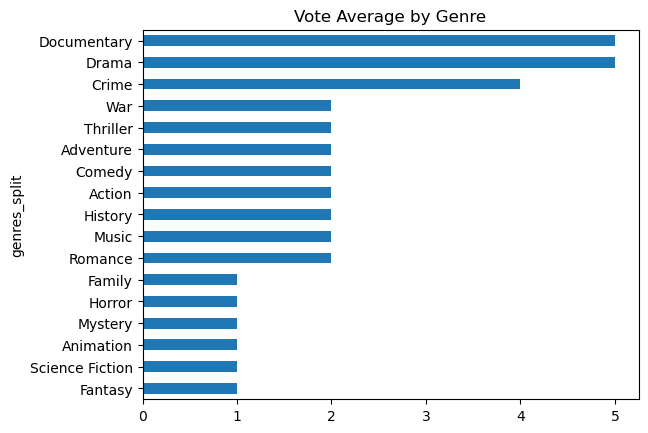

In [37]:
# Visualize the average vote score in a bar chart
genres_vote['vote_average'].plot.barh(title = 'Vote Average by Genre')

The genres with the highest number of movies scoring 8 or higher in the vote average (50+ votes) were documentary, drama, crime, war, and thriller.

### Research Hypothesis 1: The best movies according to audience score return high revenue/profit.

In [63]:
# Generate a new version of movies_genre with genres combined (not split)
movies_genre2 = movies[['popularity','budget','revenue','original_title','runtime','genres','release_date','vote_count','vote_average','profit']]
movies_genre2.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.500000,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.100000,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.300000,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.500000,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.300000,1316249360


In [67]:
# Filter to include only movies with 50 or more votes, then examine correlations
movies_50_votes = movies_genre2[movies_genre2['vote_count'] >= 50]
movies_50_votes[['budget', 'revenue', 'vote_count', 'vote_average', 'profit']].corr(method = 'spearman')

,budget,revenue,vote_count,vote_average,profit
budget,1.000000,0.714733,0.554412,-0.044050,0.334345
revenue,0.714733,1.000000,0.682550,0.112201,0.842278
vote_count,0.554412,0.682550,1.000000,0.285084,0.583606
vote_average,-0.044050,0.112201,0.285084,1.000000,0.198580
profit,0.334345,0.842278,0.583606,0.198580,1.000000


In [69]:
import seaborn as sns

[Text(0.5, 1.0, 'Revenue vs. Vote Average')]

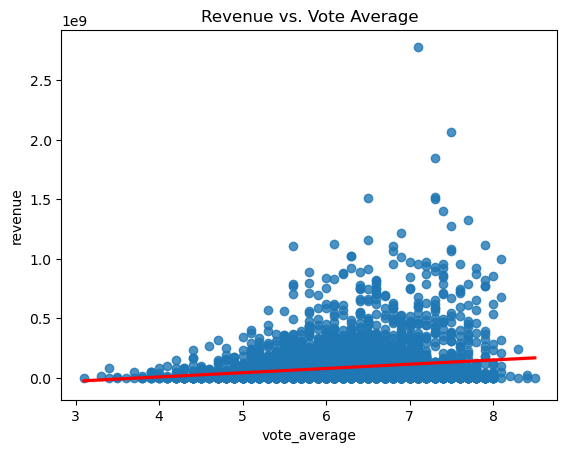

In [81]:
# Visualize the revenue vs. average vote score in a seaborn scatter plot with regression line
sns.regplot(x = 'vote_average', y = 'revenue', data = movies_50_votes, line_kws = {'color':'red'}).set(title='Revenue vs. Vote Average')

[Text(0.5, 1.0, 'Profit vs. Vote Average')]

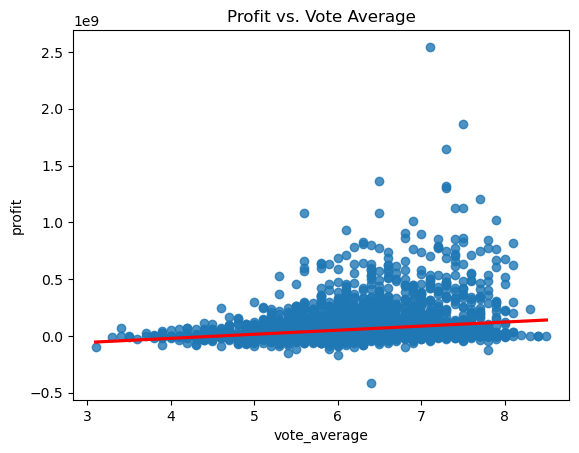

In [83]:
# Visualize the profit vs. average vote score in a seaborn scatter plot with regression line
sns.regplot(x = 'vote_average', y = 'profit', data = movies_50_votes, line_kws = {'color':'red'}).set(title='Profit vs. Vote Average')

The correlation between revenue/profit and the IMDB vote average (50+ votes) is very low. There does appear to be a small positive correlation in each case.

### Research Hypothesis 2: The best movies according to popularity return high revenue/profit.

In [99]:
# Examine the correlation between popularity score and budget, revenue, and profit
movies_genre2[['budget', 'revenue', 'popularity', 'profit']].corr(method = 'spearman')

,budget,revenue,popularity,profit
budget,1.000000,0.707584,0.567488,0.128382
revenue,0.707584,1.000000,0.618896,0.659200
popularity,0.567488,0.618896,1.000000,0.373144
profit,0.128382,0.659200,0.373144,1.000000


[Text(0.5, 1.0, 'Revenue vs. Popularity Score')]

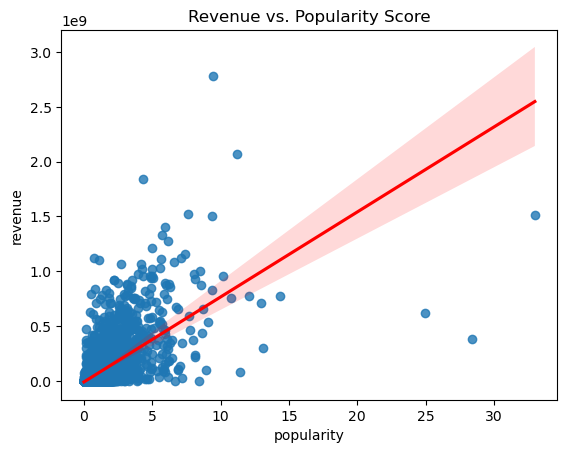

In [101]:
# Visualize the revenue vs. popularity in a seaborn scatter plot with regression line
sns.regplot(x = 'popularity', y = 'revenue', data = movies_genre2, line_kws = {'color':'red'}).set(title='Revenue vs. Popularity Score')

[Text(0.5, 1.0, 'Profit vs. Popularity Score')]

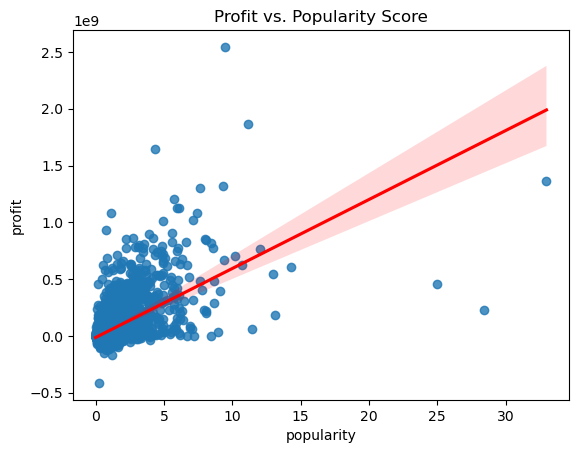

In [103]:
# Visualize the profit vs. popularity in a seaborn scatter plot with regression line
sns.regplot(x = 'popularity', y = 'profit', data = movies_genre2, line_kws = {'color':'red'}).set(title='Profit vs. Popularity Score')

Both revenue and profit have a positive correlation with the IMDB popularity score (0.62 and 0.37, respectively).

### Research Hypothesis 3: Movies with larger budgets return high revenue/profit.

[Text(0.5, 1.0, 'Revenue vs. Budget')]

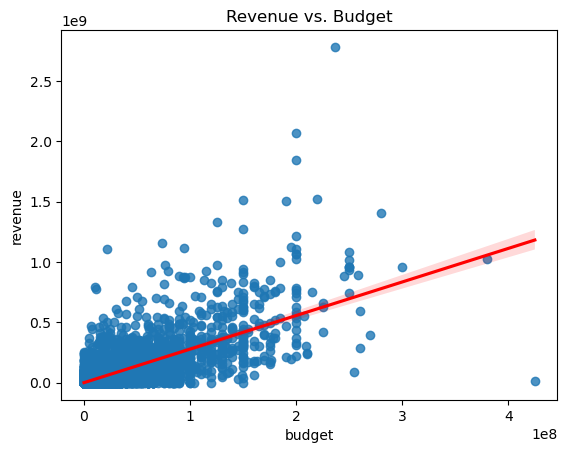

In [106]:
# Visualize revenue vs. budget in a seaborn scatter plot with regression line
sns.regplot(x = 'budget', y = 'revenue', data = movies_genre2, line_kws = {'color':'red'}).set(title='Revenue vs. Budget')

[Text(0.5, 1.0, 'Profit vs. Budget')]

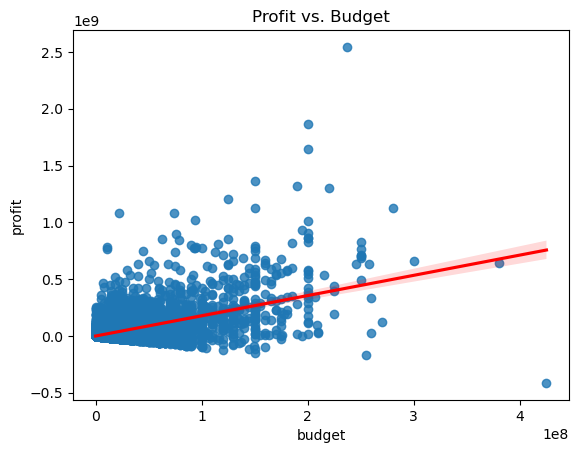

In [108]:
# Visualize profit vs. budget in a seaborn scatter plot with regression line
sns.regplot(x = 'budget', y = 'profit', data = movies_genre2, line_kws = {'color':'red'}).set(title='Profit vs. Budget')

Revenue and profit are both positively correlated with the budget (0.71 and 0.13, respectively). The linear correlation is much stronger for revenue than for profit.

### Research Hypothesis 4: Movies with larger budgets have higher popularity.

[Text(0.5, 1.0, 'Popularity Score vs. Budget')]

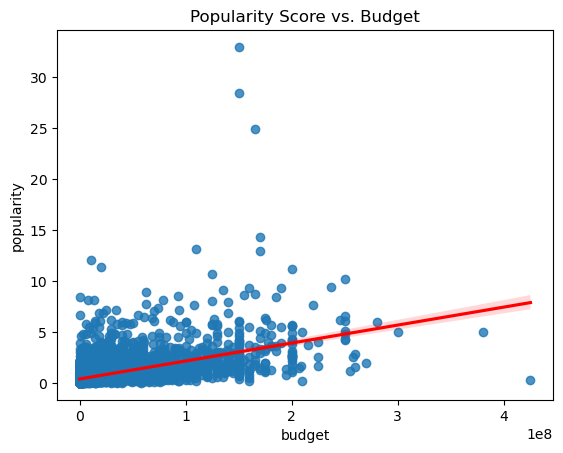

In [112]:
# Visualize popularity vs. budget in a seaborn scatter plot with regression line
sns.regplot(x = 'budget', y = 'popularity', data = movies_genre2, line_kws = {'color':'red'}).set(title='Popularity Score vs. Budget')

There is a positive correlation (0.57) between a movie's IMDB popularity score and the budget.